<a href="https://colab.research.google.com/github/vivekpenuli/LLM-/blob/main/Step_1_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load File

In [2]:

# The goal is to Read File and print its content

with open('/content/demo.txt', "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20033
I. THE BASIC FEATURES OF INDIAN
PHILOSOPHY
1. The Nature of Philosophy
Like all other living beings


Handle Diffrent regular expression


split sentence into token where each token is a word

In [3]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text) # use of regular expression for splitting word

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


We don't only want to split on whitespaces but also commas and periods, so let's modify the regular expression to do that as well

In [4]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


As we can see, this creates empty strings, let's remove them

In [7]:
cleaned = []

for item in result:
    # remove whitespace from start and end
    stripped_item = item.strip()

    # check if something is left
    if stripped_item != "":
        cleaned.append(item)

result = cleaned
print(result)


['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


Handle diffrent kind of regular expression in a text

In [8]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()] #  remove whitespace and remove empty item
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


Step2 : Implement Regular Expression in our dataset

In [9]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', '.', 'THE', 'BASIC', 'FEATURES', 'OF', 'INDIAN', 'PHILOSOPHY', '1', '.', 'The', 'Nature', 'of', 'Philosophy', 'Like', 'all', 'other', 'living', 'beings', ',', 'man', 'struggles', 'for', 'existence', '.', 'But', 'while', 'the', 'lower', 'beings']


In [ ]:
print(len(preprocessed)) # Total number of token created

Step 3: Assign Token Id

In [10]:

# Step 1 & 2: remove duplicates + sort
unique_sorted_items = sorted(set(preprocessed))

# Step 3: assign IDs
item_with_id = {item: idx for idx, item in enumerate(unique_sorted_items, start=1)}

print(item_with_id) #storing result in dictonary


{"'": 1, '(': 2, ')': 3, ',': 4, '.': 5, '1': 6, '2': 7, '3': 8, '4': 9, '5': 10, ':': 11, ';': 12, '?': 13, 'A': 14, 'According': 15, 'Aesthetics': 16, 'Anatomy': 17, 'Another': 18, 'Aryan': 19, 'As': 20, 'Astronomy': 21, 'Authority': 22, 'Axiology': 23, 'B': 24, 'BASIC': 25, 'Baladeva': 26, 'Bauddha': 27, 'Bauddhas': 28, 'Bearing': 29, 'Besides': 30, 'Bhāṣyas': 31, 'Botany': 32, 'Brahma-sūtra': 33, 'Brahmasūtra': 34, 'But': 35, 'Bādarāyana': 36, 'Chemistry': 37, 'Christian': 38, 'Consequently': 39, 'Cārvāka': 40, 'Cārvākas': 41, 'Desire': 42, 'Developed': 43, 'Division': 44, 'Does': 45, 'Each': 46, 'East': 47, 'English': 48, 'Epistemology': 49, 'Ethics': 50, 'Europe': 51, 'European': 52, 'Even': 53, 'Every': 54, 'FEATURES': 55, 'Geology': 56, 'God': 57, 'Gotama': 58, 'Gradually': 59, 'Grammarian': 60, 'He': 61, 'Hindu': 62, 'Hinduism': 63, 'Hindus': 64, 'How': 65, 'I': 66, 'INDIAN': 67, 'If': 68, 'In': 69, 'India': 70, 'Indian': 71, 'It': 72, 'Jaimini': 73, 'Jaina': 74, 'Jainas': 75,

In [11]:
for i, item in enumerate(item_with_id.items()):
    print(item)
    if i >= 50:
        break

("'", 1)
('(', 2)
(')', 3)
(',', 4)
('.', 5)
('1', 6)
('2', 7)
('3', 8)
('4', 9)
('5', 10)
(':', 11)
(';', 12)
('?', 13)
('A', 14)
('According', 15)
('Aesthetics', 16)
('Anatomy', 17)
('Another', 18)
('Aryan', 19)
('As', 20)
('Astronomy', 21)
('Authority', 22)
('Axiology', 23)
('B', 24)
('BASIC', 25)
('Baladeva', 26)
('Bauddha', 27)
('Bauddhas', 28)
('Bearing', 29)
('Besides', 30)
('Bhāṣyas', 31)
('Botany', 32)
('Brahma-sūtra', 33)
('Brahmasūtra', 34)
('But', 35)
('Bādarāyana', 36)
('Chemistry', 37)
('Christian', 38)
('Consequently', 39)
('Cārvāka', 40)
('Cārvākas', 41)
('Desire', 42)
('Developed', 43)
('Division', 44)
('Does', 45)
('Each', 46)
('East', 47)
('English', 48)
('Epistemology', 49)
('Ethics', 50)
('Europe', 51)


In [13]:
item_with_id['Europe']

51

Assignment of token id is done but how do i get token id of a sentence " Indian phiposphy " ?

In [17]:
word = "but even"
value = item_with_id.get(word)
print(value)

None


ENCODER

a. read the text
b. split the text into token with same regular expression and store in words list
c. pick each item form list find its token id from item_wit_id dictonary

In [21]:
raw_text2 = "but even their far-reaching consequences. Desire for knowledge springs"
words = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text2)
words = [item.strip() for item in words if item.strip()]
mapped_values = [item_with_id.get(word) for word in words]
print(mapped_values)


[244, 388, 840, 405, 290, 5, 42, 420, 508, 782]


DECODER

now i want from token id , i want the corresponding word back. issue is word and token id are stored in dictornaty .
You have a dictionary and you know the value, but you want to get the key back.

In [22]:
value_to_key = {v: k for k, v in item_with_id.items()}
print(value_to_key)

{1: "'", 2: '(', 3: ')', 4: ',', 5: '.', 6: '1', 7: '2', 8: '3', 9: '4', 10: '5', 11: ':', 12: ';', 13: '?', 14: 'A', 15: 'According', 16: 'Aesthetics', 17: 'Anatomy', 18: 'Another', 19: 'Aryan', 20: 'As', 21: 'Astronomy', 22: 'Authority', 23: 'Axiology', 24: 'B', 25: 'BASIC', 26: 'Baladeva', 27: 'Bauddha', 28: 'Bauddhas', 29: 'Bearing', 30: 'Besides', 31: 'Bhāṣyas', 32: 'Botany', 33: 'Brahma-sūtra', 34: 'Brahmasūtra', 35: 'But', 36: 'Bādarāyana', 37: 'Chemistry', 38: 'Christian', 39: 'Consequently', 40: 'Cārvāka', 41: 'Cārvākas', 42: 'Desire', 43: 'Developed', 44: 'Division', 45: 'Does', 46: 'Each', 47: 'East', 48: 'English', 49: 'Epistemology', 50: 'Ethics', 51: 'Europe', 52: 'European', 53: 'Even', 54: 'Every', 55: 'FEATURES', 56: 'Geology', 57: 'God', 58: 'Gotama', 59: 'Gradually', 60: 'Grammarian', 61: 'He', 62: 'Hindu', 63: 'Hinduism', 64: 'Hindus', 65: 'How', 66: 'I', 67: 'INDIAN', 68: 'If', 69: 'In', 70: 'India', 71: 'Indian', 72: 'It', 73: 'Jaimini', 74: 'Jaina', 75: 'Jainas',

In [24]:
values = [value_to_key.get(key) for key in mapped_values]

print(values)

['but', 'even', 'their', 'far-reaching', 'consequences', '.', 'Desire', 'for', 'knowledge', 'springs']


In [26]:
import re

class SimpleTokenizer:
    def __init__(self, vocab): # passing vocabolary
        # word → id
        self.word_to_id = vocab   # used by encoder

        # id → word (reverse dictionary)
        self.id_to_word = {}
        for word, idx in vocab.items():
            self.id_to_word[idx] = word   # used by decoder to get value from key

    def encode(self, text):
        # Step 1: split text into words and punctuation
        tokens = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        # Step 2: remove empty and whitespace tokens
        clean_tokens = []
        for token in tokens:
            token = token.strip()
            if token:
                clean_tokens.append(token)  # job is to create a list of input text token

        # Step 3: convert tokens to ids
        ids = []
        for token in clean_tokens:
            ids.append(self.word_to_id[token])  # map each item in list with its key

        return ids

    def decode(self, ids): # recive Token ID list
        # Step 1: convert ids back to tokens
        words = []
        for idx in ids:
            words.append(self.id_to_word[idx]) # get each token id ---> word

        # Step 2: join tokens with spaces
        text = " ".join(words)  # append the list into text

        # Step 3: remove space before punctuation
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) # remove extra space from text

        return text



In [27]:
tokenizer = SimpleTokenizer(item_with_id) # passing vocabulary

ids = tokenizer.encode("therefore, from the rational nature of man. Philosophy is an attempt to satisfy this very reasonable desire.")
print(ids)

text = tokenizer.decode(ids)
print(text)


[848, 4, 430, 839, 696, 589, 606, 545, 5, 107, 498, 184, 206, 869, 737, 854, 914, 702, 329, 5]
therefore, from the rational nature of man. Philosophy is an attempt to satisfy this very reasonable desire.


Dealing with unknown words in a text

In [28]:
tokenizer = SimpleTokenizer(item_with_id)

text = "Hello, do you like tea. Is this-- a test?"

tokenizer.encode(text)

KeyError: 'Hello'

In [34]:
import re

class SimpleTokenizerV2:
    def __init__(self, vocab): # passing vocabolary
        # Add a special token for unknown words if it doesn't exist
        if "<UNK>" not in vocab:
            # Assign a new ID, typically the next available integer
            vocab["<UNK>"] = max(vocab.values()) + 1 if vocab else 0

        # word → id
        self.word_to_id = vocab   # used by encoder

        # id → word (reverse dictionary)
        self.id_to_word = {}
        for word, idx in vocab.items():
            self.id_to_word[idx] = word   # used by decoder to get value from key

    def encode(self, text):
        # Step 1: split text into words and punctuation
        tokens = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        # Step 2: remove empty and whitespace tokens
        clean_tokens = []
        for token in tokens:
            token = token.strip()
            if token:
                clean_tokens.append(token)  # job is to create a list of input text token

        # Step 3: convert tokens to ids
        ids = []
        for token in clean_tokens:
            # Handle unknown words by assigning the <UNK> token ID
            ids.append(self.word_to_id.get(token, self.word_to_id["<UNK>"]))
        return ids

    def decode(self, ids): # recive Token ID list
        # Step 1: convert ids back to tokens
        words = []
        for idx in ids:
            words.append(self.id_to_word[idx]) # get each token id ---> word

        # Step 2: join tokens with spaces
        text = " ".join(words)  # append the list into text

        # Step 3: remove space before punctuation
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) # remove extra space from text

        return text

In [35]:
tokenizer = SimpleTokenizerV2(item_with_id) # passing vocabulary

ids = tokenizer.encode("therefore, is an Tea Bag.")
print(ids)

text = tokenizer.decode(ids)
print(text)


[848, 4, 498, 184, 956, 956, 5]
therefore, is an <UNK> <UNK>.


# **2.5 BytePair encoding**


In [36]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.12.0


In [37]:
tokenizer = tiktoken.get_encoding("gpt2")

It split your text into Token based on the BPE Algo .As a result all words can get tokenize

In [38]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [39]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


Now we dont have to worry Encoding and decoding of our text

# 2.6 Data sampling with a sliding window

We train LLMs to generate one word at a time, so we want to prepare the training data accordingly where the next word in a sequence represents the target to predict:
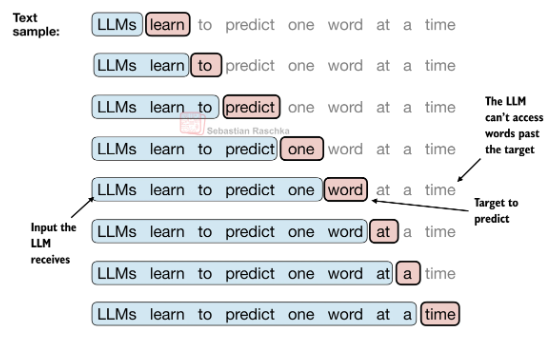

In [61]:
# The goal is to Read File and print its content

with open('/content/demo.txt', "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of character:", len(raw_text))
print(raw_text[:99])

integers = tokenizer.encode(raw_text) # convert text into token
print(integers[:99])

Total number of character: 20033
I. THE BASIC FEATURES OF INDIAN
PHILOSOPHY
1. The Nature of Philosophy
Like all other living beings
[40, 13, 3336, 29809, 2149, 18630, 47471, 3963, 24413, 16868, 198, 11909, 4146, 2640, 3185, 42598, 198, 16, 13, 383, 10362, 286, 26099, 198, 7594, 477, 584, 2877, 9791, 11, 582, 12766, 329, 6224, 13, 887, 981, 262, 198, 21037, 9791, 6531, 517, 393, 1342, 39615, 1231, 597, 6921, 1410, 290, 198, 29983, 11, 290, 670, 416, 13311, 11, 582, 3544, 262, 9098, 6979, 286, 465, 7654, 284, 198, 4625, 1481, 262, 3403, 290, 3616, 286, 262, 6531, 290, 284, 44668, 3352, 198, 392, 12834, 284, 4155, 1943, 13, 679, 12802, 284, 1085, 465, 1204, 287, 262, 1657, 286]


For each text chunk, we want the inputs and targets
Since we want the model to predict the next word, the targets are the inputs shifted by one position to the right

In [63]:
enc_sample = integers[:100]
print(enc_sample)

[40, 13, 3336, 29809, 2149, 18630, 47471, 3963, 24413, 16868, 198, 11909, 4146, 2640, 3185, 42598, 198, 16, 13, 383, 10362, 286, 26099, 198, 7594, 477, 584, 2877, 9791, 11, 582, 12766, 329, 6224, 13, 887, 981, 262, 198, 21037, 9791, 6531, 517, 393, 1342, 39615, 1231, 597, 6921, 1410, 290, 198, 29983, 11, 290, 670, 416, 13311, 11, 582, 3544, 262, 9098, 6979, 286, 465, 7654, 284, 198, 4625, 1481, 262, 3403, 290, 3616, 286, 262, 6531, 290, 284, 44668, 3352, 198, 392, 12834, 284, 4155, 1943, 13, 679, 12802, 284, 1085, 465, 1204, 287, 262, 1657, 286, 198]


In [64]:

context_size = 4
#length of the input
#The context_size of 4 means that the model is trained to look at a sequence of 4 words (or tokens)
#to predict the next word in the sequence.
#The input x is the first 4 tokens [1, 2, 3, 4], and the target y is the next 4 tokens [2, 3, 4, 5]
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [40, 13, 3336, 29809]
y:      [13, 3336, 29809, 2149]


<div class="alert alert-block alert-success">
Processing the inputs along with the targets, which are the inputs shifted by one position,
we can then create the next-word prediction tasks as
follows:</div>

In [65]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[40] ----> 13
[40, 13] ----> 3336
[40, 13, 3336] ----> 29809
[40, 13, 3336, 29809] ----> 2149


Everything left of the arrow (---->) refers to the input an LLM would receive, and the token ID on the right side of the arrow represents the target token ID that the LLM is supposed to predict.

In [66]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

I ----> .
I. ---->  THE
I. THE ---->  BAS
I. THE BAS ----> IC


<div class="alert alert-block alert-warning">

There's only one more task before we can turn the tokens into embeddings:implementing an efficient data loader that
iterates over the input dataset and returns the inputs and targets as PyTorch tensors, which
can be thought of as multidimensional arrays.
    
</div>

<div class="alert alert-block alert-warning">

In particular, we are interested in returning two tensors: an input tensor containing the
text that the LLM sees and a target tensor that includes the targets for the LLM to predict,
    
</div>

I want this . When i pass the Text i want two tensor in output

### IMPLEMENTING A DATA LOADER

<div class="alert alert-block alert-success">
For the efficient data loader implementation, we will use PyTorch's built-in Dataset and
DataLoader classes.</div>

<div class="alert alert-block alert-info">
    
Step 1: Tokenize the entire text
    
Step 2: Use a sliding window to chunk the book into overlapping sequences of max_length

Step 3: Return the total number of rows in the dataset

Step 4: Return a single row from the dataset
</div>

I dont get why we need this ?

### CREATING TOKEN EMBEDDINGS

In [67]:
import torch
input_ids = torch.tensor([2, 3, 5, 1])


<div class="alert alert-block alert-success">
    
For the sake of simplicity and illustration purposes, suppose we have a small vocabulary of
only 6 words (instead of the 50,257 words in the BPE tokenizer vocabulary), and we want
to create embeddings of size 3 (in GPT-3, the embedding size is 12,288 dimensions):

</div>

<div class="alert alert-block alert-success">
    
Using the vocab_size and output_dim, we can instantiate an embedding layer in PyTorch,
setting the random seed to 123 for reproducibility purposes:

</div>

In [70]:
vocab_size = 6  #  word/Token
output_dim = 3  # vector dimnesion of token

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer)

Embedding(6, 3)


In [72]:
print(embedding_layer(torch.tensor([0])))

tensor([[ 0.3374, -0.1778, -0.1690]], grad_fn=<EmbeddingBackward0>)


The print statement in the code prints the embedding layer's underlying
weight matrix:

In nn.Embedding, weight is just a trainable matrix.

1. Each row of this matrix is the embedding vector for one token (or position).

2. “Weight” here simply means learnable numbers that the model can change during training.

3. It’s not a function, it’s just a matrix.

In [69]:
print(embedding_layer.weight) # this weight is those random value which we are talking about which get initalise when we call nn. emdeing


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


<div class="alert alert-block alert-info">
    
We can see that the weight matrix of the embedding layer contains small, random values.
These values are optimized during LLM training as part of the LLM optimization itself, as we
will see in upcoming chapters. Moreover, we can see that the weight matrix has six rows
and three columns. There is one row for each of the six possible tokens in the vocabulary.
And there is one column for each of the three embedding dimensions.
    
</div>

<div class="alert alert-block alert-success">
    
Previously, we have seen how to convert a single token ID into a three-dimensional
embedding vector. Let's now apply that to all four input IDs we defined earlier
(torch.tensor([2, 3, 5, 1])):

</div>

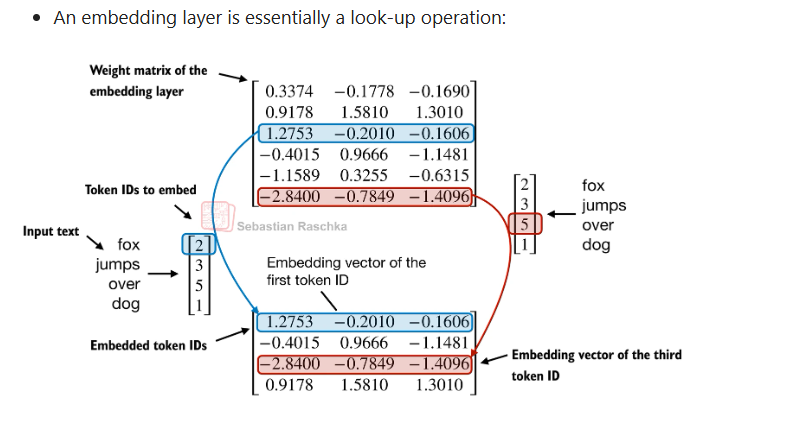

In [73]:
print(embedding_layer(input_ids)) # Passing multiple key to access there value


tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)
